In [1]:
from keras.datasets import mnist
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten,LeakyReLU
from keras.layers import Activation,BatchNormalization
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,AveragePooling2D,Reshape, Conv2DTranspose
from keras.models import Model
from keras import backend as K
from scipy import misc
from os import listdir
import scipy
import scipy.ndimage as ndimage
# import cv2
from scipy.misc import toimage
import scipy.ndimage
import matplotlib.pyplot as plt

In [2]:
def LAPSRN(x):
    temp = Conv2D(64,(3,3),padding='same')(x)
    temp = BatchNormalization(temp)
    temp = LeakyReLU(alpha=0.2)(temp)
    temp = Conv2D(64,(3,3),padding = 'same')(temp)
    temp = BatchNormalization(temp)
    temp = LeakyReLU(alpha=0.2)(temp)
    temp = Conv2DTranspose(1,(4,4))(temp)
    x2 = temp
    temp = Conv2D(64,(3,3),padding = 'same')(temp)
    temp = BatchNormalization(temp)
    temp = LeakyReLU(alpha = 0.2)(temp)
    temp = Conv2D(64,(3,3),padding = 'same')(temp)
    temp = BatchNormalization(temp)
    temp = LeakyReLU(alpha=0.2)(temp)
    temp = Conv2DTranspose(1,(4,4))(temp)
    x4 = temp
    temp = Conv2D(64,(3,3),padding = 'same')(temp)
    temp = BatchNormalization(temp)
    temp = LeakyReLU()(temp)
    temp = Conv2D(64,(3,3),padding = 'same')(temp)
    temp = BatchNormalization(temp)
    temp = LeakyReLU()(temp)
    temp = Conv2DTranspose(1,(4,4))(temp)
    x8 = temp
    temp = Conv2D(64,(3,3),padding = 'same')(temp)
    temp = BatchNormalization(temp)
    temp = LeakyReLU(alpha = 0.2)(temp)
    temp = Conv2D(64,(3,3),padding = 'same')(temp)
    temp = BatchNormalization(temp)
    temp = LeakyReLU(alpha = 0.2)(temp)
    temp = Conv2DTranspose(1,(3,3))(temp)
    x16 = temp
    return (x2,x4,x8,x16)

In [3]:
def preprocess():
    (x_train,y_train),(x_test,y_test) = mnist.load_data()
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    print (x_train[0][0])

    _y_train = np.zeros(shape=(x_train.shape[0], 39, 39))
    _y_test = np.zeros(shape=(x_test.shape[0], 39, 39))
    
    for i in range(len(y_train)):
        _y_train[i, :] = scipy.ndimage.zoom(x_train[i, :], 1.4, order=1)

    for j in range(len(y_test)):
        _y_test[j, :] = scipy.ndimage.zoom(x_test[j, :], 1.4, order=1)

    x_train = ndimage.gaussian_filter(x_train,0.9)
    x_test = ndimage.gaussian_filter(x_test,0.9)
    
    x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
    x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
    
    _y_train = np.reshape(_y_train, (len(_y_train), 39, 39, 1))
    _y_test= np.reshape(_y_test, (len(_y_test), 39, 39, 1))
    return (x_train,_y_train,x_test,_y_test)

In [4]:
input_img = Input(shape = (28,28,1))

In [5]:
op1,op2,op3,op4 = LAPSRN(input_img)

In [6]:
model1 = Model(input_img,op1)

In [7]:
model2 = Model(input_img,op2)

In [8]:
model3 = Model(input_img,op3)

In [9]:
model4 = Model(input_img,op4)

In [10]:
model4.compile(optimizer='adadelta',loss = 'mean_squared_error')

In [11]:
x_train,y_train,x_test,y_test = preprocess()

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [12]:
np.shape(x_train)

(60000, 28, 28, 1)

In [13]:
np.shape(y_train)

(60000, 39, 39, 1)

In [14]:
model4.fit(x_train,y_train,batch_size=256,shuffle=True, verbose=2, epochs=10)

Epoch 1/10
138s - loss: 0.0579
Epoch 2/10
71s - loss: 0.0431
Epoch 3/10
71s - loss: 0.0361
Epoch 4/10
72s - loss: 0.0327
Epoch 5/10
73s - loss: 0.0310
Epoch 6/10
73s - loss: 0.0300
Epoch 7/10
73s - loss: 0.0292
Epoch 8/10
71s - loss: 0.0285
Epoch 9/10
71s - loss: 0.0279
Epoch 10/10
71s - loss: 0.0274


In [27]:
x_train.shape

(60000, 28, 28)

In [15]:
out = model4.predict(np.expand_dims(x_test[0], axis=0))
out2 = np.reshape(out, (39, 39))

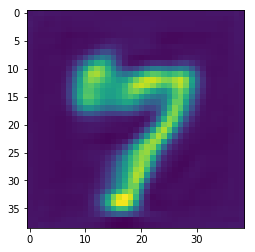

In [16]:
#reduced noise image
plt.imshow(toimage(out2))
plt.show()

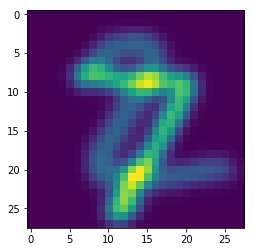

In [17]:
#input image
img2 = np.reshape(x_test[0], (28, 28))
plt.imshow(toimage(img2))
plt.show()

In [18]:
img3 = scipy.ndimage.zoom(x_test[0], 1.4, order=3)

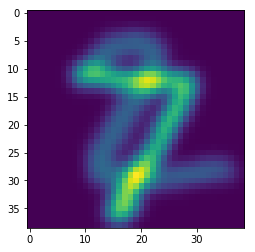

In [19]:
img3 = np.reshape(img3, (39, 39))
plt.imshow(toimage(img3))
plt.show()

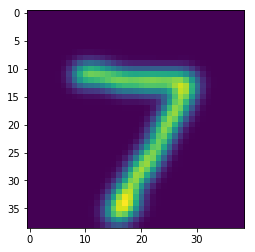

In [30]:
x_test20 = ndimage.gaussian_filter(x_test2[0],0.9)
img3 = scipy.ndimage.zoom(x_test20, 1.4, order=3)
img3 = np.reshape(img3, (39, 39))
plt.imshow(toimage(img3))
plt.show()

In [21]:
(x_train2,y_train2),(x_test2,y_test2) = mnist.load_data()

In [39]:
x_train5 = ndimage.gaussian_filter(x_train2,0.5)

In [40]:
x_train9 = ndimage.gaussian_filter(x_train2,0.9)

In [41]:
img1 = np.reshape(x_train5[0], (28, 28))
img2 = np.reshape(x_train9[0], (28, 28))

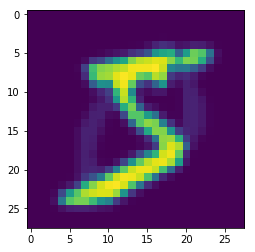

In [42]:
plt.imshow(toimage(img1))
plt.show()

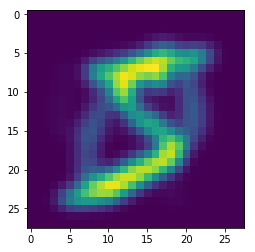

In [43]:
plt.imshow(toimage(img2))
plt.show()